In [17]:
NUM_SIMULATIONS = 10000

ENHANCED_WEAPON_PROBABILITY = 1/400.0
ARMOR_PROBABILITY = 1/50.0

DESIRED_ARMOR_SEEDS = 6 * 5 # 6 pieces, 5 sets
DESIRED_ENHANCED_WEAPON_SEEDS = 1 * 5 # 1 piece, 5 sets

In [18]:
# Simulate the Gauntlet runs
import random

# Simulate the number of runs needed to collect all the desired rewards
def simulate_gauntlet_runs(num_simulations, desired_armor_seeds, desired_enhanced_weapon_seeds) -> list[int]:
    results = []
    for _ in range(num_simulations):
        armor_seeds = 0
        enhanced_weapon_seeds = 0
        runs = 0
        
        while armor_seeds < desired_armor_seeds or enhanced_weapon_seeds < desired_enhanced_weapon_seeds:
            runs += 1
            if random.random() < ARMOR_PROBABILITY:
                armor_seeds += 1
            if random.random() < ENHANCED_WEAPON_PROBABILITY:
                enhanced_weapon_seeds += 1
        
        results.append(runs)
    
    return results

In [21]:
import time

start_time = time.time()
simulation_results = simulate_gauntlet_runs(NUM_SIMULATIONS, DESIRED_ARMOR_SEEDS, DESIRED_ENHANCED_WEAPON_SEEDS)

elapsed_time = time.time() - start_time
print(f"Simulated {NUM_SIMULATIONS} Gauntlet runs in {elapsed_time:.2f} seconds.")

Simulated 10000 Gauntlet runs in 1.29 seconds.


Mean number of runs needed: 2152.9447
Median number of runs needed: 1941.0
75th percentile of runs needed: 2510.0
90th percentile of runs needed: 3219.0


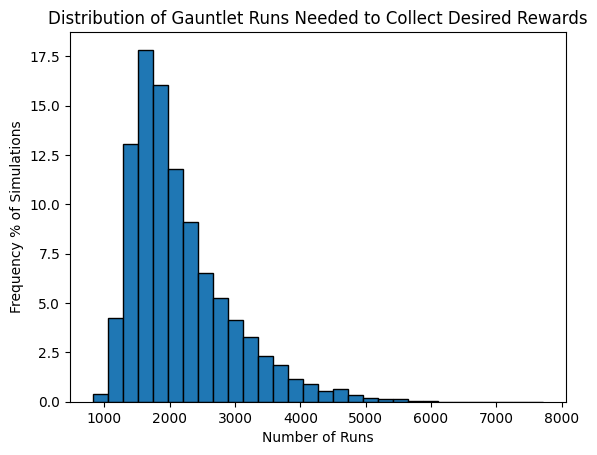

In [20]:

# Analyze the results
import statistics
mean_runs = statistics.mean(simulation_results)
median_runs = statistics.median(simulation_results)
seventy_fifth_percentile = statistics.quantiles(simulation_results, n=100)[74]
ninetieth_percentile = statistics.quantiles(simulation_results, n=100)[89]
print(f"Mean number of runs needed: {mean_runs}")
print(f"Median number of runs needed: {median_runs}")
print(f"75th percentile of runs needed: {seventy_fifth_percentile}")
print(f"90th percentile of runs needed: {ninetieth_percentile}")

# Plot a histogram of the results
import matplotlib.pyplot as plt
weights = [100.0 / len(simulation_results)] * len(simulation_results)
plt.hist(simulation_results, bins=30, edgecolor='black', weights=weights)
plt.title('Distribution of Gauntlet Runs Needed to Collect Desired Rewards')
plt.xlabel('Number of Runs')
plt.ylabel(f'Frequency % of Simulations')
plt.show()